In [18]:
import numpy as np
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns

c:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


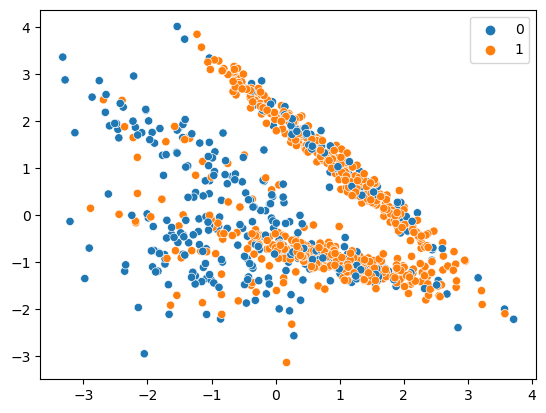

In [68]:
from sklearn.datasets import make_classification
# Generate noisy Data
X,y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2,class_sep=1,flip_y=0.5,weights=[0.25,0.75], random_state=17)
sns.scatterplot(X[:,0],X[:,1],hue=y);
plt.show();

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Classification Model for above synthetic data

In [70]:
model = Sequential()

In [71]:
model.add(Dense(128,activation="relu",input_dim=2))
model.add(Dense(128,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))

In [72]:
adam = Adam(learning_rate=0.01)
model.compile(optimizer=adam, loss="binary_crossentropy",metrics=["accuracy", "binary_crossentropy"])

In [73]:
history = model.fit(X_train,y_train,epochs=500, verbose=True, validation_data=(X_test, y_test))

Epoch 1/500


22/22 [==============================] - 1s 13ms/step - loss: 0.6474 - accuracy: 0.6529 - binary_crossentropy: 0.6474 - val_loss: 0.6372 - val_accuracy: 0.6933 - val_binary_crossentropy: 0.6372
Epoch 2/500
22/22 [==============================] - 0s 3ms/step - loss: 0.6014 - accuracy: 0.7157 - binary_crossentropy: 0.6014 - val_loss: 0.6027 - val_accuracy: 0.7067 - val_binary_crossentropy: 0.6027
Epoch 3/500
22/22 [==============================] - 0s 3ms/step - loss: 0.5862 - accuracy: 0.7300 - binary_crossentropy: 0.5862 - val_loss: 0.6238 - val_accuracy: 0.7100 - val_binary_crossentropy: 0.6238
Epoch 4/500
22/22 [==============================] - 0s 3ms/step - loss: 0.5923 - accuracy: 0.7314 - binary_crossentropy: 0.5923 - val_loss: 0.6004 - val_accuracy: 0.7033 - val_binary_crossentropy: 0.6004
Epoch 5/500
22/22 [==============================] - 0s 3ms/step - loss: 0.5881 - accuracy: 0.7271 - binary_crossentropy: 0.5881 - val_loss: 0.6005 - val_accuracy: 0.7100 - val_binary_crossen

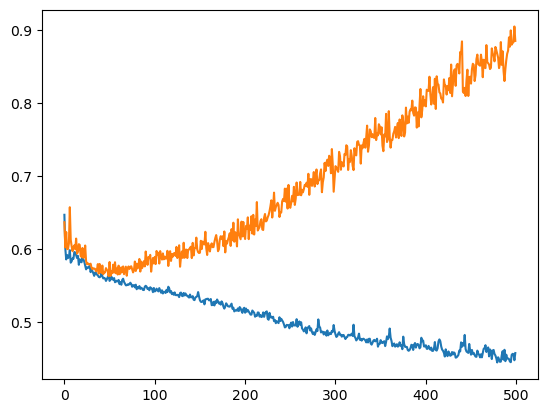

In [74]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [75]:
!pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 1.1 MB/s eta 0:00:00


In [76]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 8s 875us/step


<AxesSubplot:>

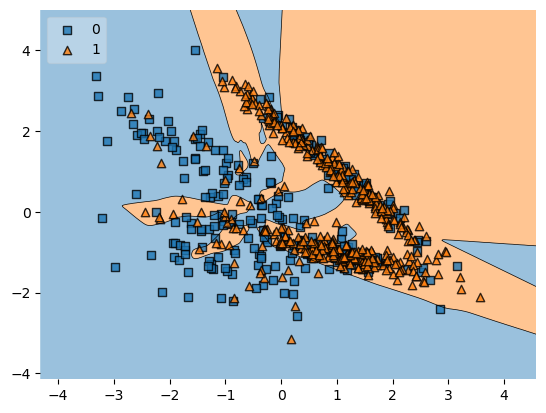

In [77]:
plot_decision_regions(X_train, y_train.astype('int'), clf=model, legend=2)

Above two curves clearly identify overfitting of the data, now we are try to overcome this using Dropouts

In [101]:
model = Sequential()

model.add(Dense(128,activation="relu",input_dim=2))
model.add(Dropout(0.6))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128,activation="sigmoid"))
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))

In [102]:
adam = Adam(learning_rate=0.01)
model.compile(optimizer=adam, loss="binary_crossentropy",metrics=["accuracy", "binary_crossentropy"])

In [103]:
history = model.fit(X_train, y_train, verbose=True, epochs=500, validation_data=(X_test, y_test))

Epoch 1/500


22/22 [==============================] - 1s 15ms/step - loss: 0.6703 - accuracy: 0.6414 - binary_crossentropy: 0.6703 - val_loss: 0.6093 - val_accuracy: 0.6867 - val_binary_crossentropy: 0.6093
Epoch 2/500
22/22 [==============================] - 0s 4ms/step - loss: 0.6482 - accuracy: 0.6857 - binary_crossentropy: 0.6482 - val_loss: 0.6173 - val_accuracy: 0.7067 - val_binary_crossentropy: 0.6173
Epoch 3/500
22/22 [==============================] - 0s 3ms/step - loss: 0.6083 - accuracy: 0.7114 - binary_crossentropy: 0.6083 - val_loss: 0.6076 - val_accuracy: 0.7100 - val_binary_crossentropy: 0.6076
Epoch 4/500
22/22 [==============================] - 0s 3ms/step - loss: 0.5979 - accuracy: 0.7014 - binary_crossentropy: 0.5979 - val_loss: 0.6035 - val_accuracy: 0.7167 - val_binary_crossentropy: 0.6035
Epoch 5/500
22/22 [==============================] - 0s 3ms/step - loss: 0.6102 - accuracy: 0.7186 - binary_crossentropy: 0.6102 - val_loss: 0.6000 - val_accuracy: 0.7133 - val_binary_crossen

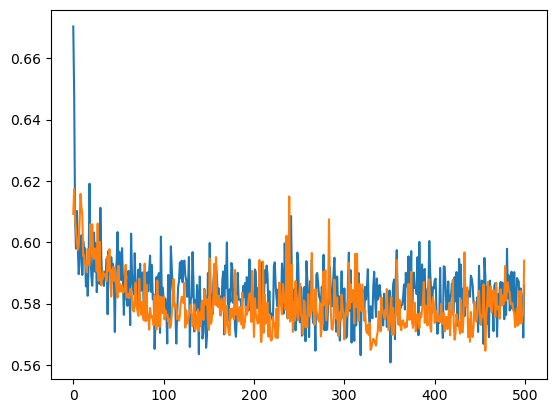

In [104]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

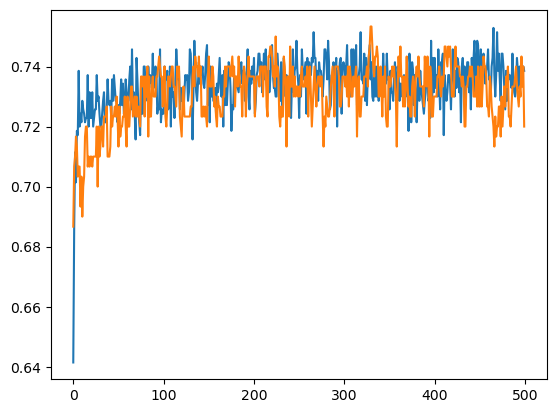

In [105]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

9600/9600 [==============================] - 12s 1ms/step


<AxesSubplot:>

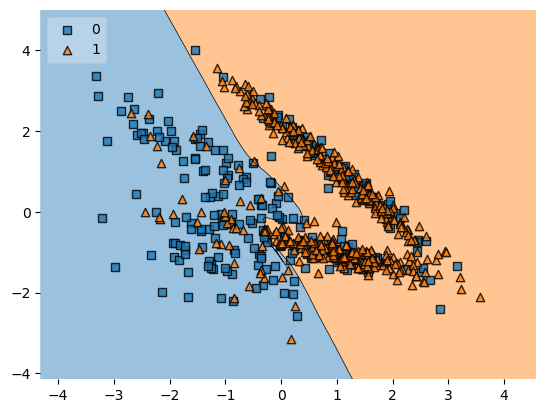

In [106]:
plot_decision_regions(X_train,y_train,clf=model,legend=2)

Using dropouts we can significantly reduce problem of overfitting. As a general reule of thumb, add dropout from last layer first and then check if needed then add onto second last and so on.